In [1]:
import pandas as pd
df_sample=pd.read_csv("./20sampleimages.csv")
df_sample

,Unnamed: 0,photo_id,keyword,photo_image_url
0,0,9CfajiGQL0o,nature,https://images.unsplash.com/photo-1552394459-9...
1,1,_3-OwU30m3Q,plant,https://images.unsplash.com/photo-157156154493...
2,2,59tcmWzKrZo,outdoors,https://images.unsplash.com/photo-158394153365...
3,3,_VwKE9cjops,animal,https://images.unsplash.com/photo-157045046675...
4,4,sR_J5Md1XAY,tree,https://images.unsplash.com/photo-1543178557-b...
5,5,w-pEeDGN1w0,clothing,https://images.unsplash.com/photo-156539595575...
6,6,JxbqicKm-ko,apparel,https://images.unsplash.com/photo-1542595735-1...
7,7,OouFKZynpAM,symbol,https://images.unsplash.com/photo-156415391747...
8,8,wANOyJD6QP8,building,https://images.unsplash.com/photo-154221929235...
9,9,WpwHJZoSAC8,sky,https://images.unsplash.com/photo-151380045305...


In [2]:
def path_to_image_html(path):
    '''
     This function essentially convert the image url to
     '<img src="'+ path + '"/>' format. And one can put any
     formatting adjustments to control the height, aspect ratio, size etc.
     within as in the below example.
    '''

    return '<img src="'+ path + '" style=max-height:224px;"/>'
    #return '<img src="'+ path+'/>'

In [3]:
!pip install salesforce-lavis
# no need, have been installed in conda env

In [4]:
!pip install ipywidgets

In [5]:
import torch
from PIL import Image

from lavis.models import load_model_and_preprocess

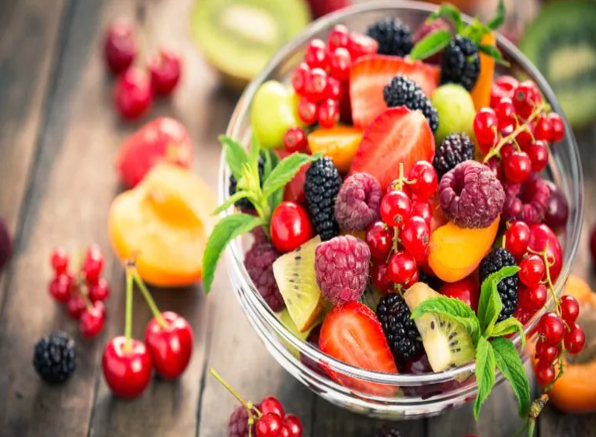

In [6]:
raw_image = Image.open("./fruit.png").convert("RGB").resize((596, 437))
caption = "a photo of different kinds of fruits"

display(raw_image)

In [7]:
# setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu" 

In [8]:
# check the availablity of cuda gpu
print(torch.cuda.is_available()) 
print("Using device:", device)

True
Using device: cuda


In [9]:
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip2_feature_extractor", model_type="pretrain", is_eval=True, device=device)


c:\Users\47552\anaconda3\envs\lavis\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\47552\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [10]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
text_input = txt_processors["eval"](caption)
sample = {"image": image, "text_input": [text_input]}

In [11]:
sample

{'image': tensor([[[[-0.7412, -0.6974, -0.6536,  ..., -0.9893, -0.9893, -0.9456],
           [-0.7412, -0.6974, -0.6536,  ..., -1.0185, -1.0331, -1.0477],
           [-0.7558, -0.6974, -0.6536,  ..., -0.9893, -1.0185, -1.0915],
           ...,
           [-0.9310, -0.8434, -0.8288,  ..., -1.1937, -1.0477, -1.0477],
           [-0.9310, -0.9018, -0.8580,  ..., -1.1645, -1.0185, -1.0623],
           [-0.9602, -0.9456, -0.9164,  ..., -1.0915, -1.0039, -1.0331]],
 
          [[-0.7466, -0.7166, -0.6865,  ..., -0.7916, -0.7766, -0.7466],
           [-0.7466, -0.7166, -0.6865,  ..., -0.7466, -0.7616, -0.7916],
           [-0.7616, -0.7166, -0.6715,  ..., -0.6415, -0.6715, -0.7466],
           ...,
           [-0.9417, -0.8666, -0.8366,  ..., -1.3319, -1.1668, -1.1968],
           [-0.9717, -0.9267, -0.8516,  ..., -1.2869, -1.1368, -1.1668],
           [-0.9867, -0.9417, -0.9117,  ..., -1.2118, -1.1068, -1.1218]],
 
          [[-0.5986, -0.5701, -0.5417,  ..., -1.1389, -1.0963, -1.0536],
    

In [12]:
# get the features of the raw image, which is the fruit.png
features_query_image = model.extract_features(sample, mode="image")
features_query_text = model.extract_features(sample, mode="text")


In [13]:
# get the all 25000 images
# fisrt we load the unsplash dataset
import numpy as np
import pandas as pd
import glob
path = './unsplash-research-dataset-lite-latest/'
documents = ['photos']
datasets = {}

for doc in documents:
  files = glob.glob(path + doc + ".tsv*")

  subsets = []
  for filename in files:
    df = pd.read_csv(filename, sep='\t', header=0)
    subsets.append(df)

  datasets[doc] = pd.concat(subsets, axis=0, ignore_index=True)

In [14]:
datasets['photos'].head()
# show the length of the dataset: 25000
# len(datasets['photos'])

,photo_id,photo_url,photo_image_url,photo_submitted_at,photo_featured,photo_width,photo_height,photo_aspect_ratio,photo_description,photographer_username,...,photo_location_country,photo_location_city,stats_views,stats_downloads,ai_description,ai_primary_landmark_name,ai_primary_landmark_latitude,ai_primary_landmark_longitude,ai_primary_landmark_confidence,blur_hash
0,wud-eV6Vpwo,https://unsplash.com/photos/wud-eV6Vpwo,https://images.unsplash.com/photo-143924685475...,2015-08-10 22:48:30.841999,t,4273,2392,1.79,NaN,sergio_rola,...,NaN,NaN,7515660,42055,silhouette of structure under red sky,NaN,NaN,NaN,NaN,LJMymdi{1IWo}Gj[w^WVICS#bbS2
1,psIMdj26lgw,https://unsplash.com/photos/psIMdj26lgw,https://images.unsplash.com/photo-144077331099...,2015-08-28 14:49:40.016052,t,3872,2176,1.78,NaN,xcvii,...,NaN,NaN,1814817,5893,selective focus photography of black animal ne...,NaN,NaN,NaN,NaN,"LKKd}R^,bJD%~q4Txu%N%gxuD$xu"
2,2EDjes2hlZo,https://unsplash.com/photos/2EDjes2hlZo,https://images.unsplash.com/photo-144683489809...,2015-11-06 18:36:17.334458,t,2560,1707,1.50,Sunset reflection over river,imthinhvu,...,NaN,NaN,2708347,12420,photo of body body of water during golden hour,NaN,NaN,NaN,NaN,LeI{]g9u9u%1?KV@s8R-EAf#t5aL
3,WN8kSLy8KMQ,https://unsplash.com/photos/WN8kSLy8KMQ,https://images.unsplash.com/photo-144530812443...,2015-10-20 02:29:20.267471,t,2288,1520,1.51,Hiking The Mountains,bettenz,...,NaN,NaN,1616448,9773,green leafed trees between two rock formations,Zion National Park,37.250981,-112.950525,65.07215,LoDv=$sjD$bc.AV@ROWCtSn~s:Rj
4,QAXDmkU60OU,https://unsplash.com/photos/QAXDmkU60OU,https://images.unsplash.com/photo-144196149785...,2015-09-11 08:51:54.202624,t,2048,1371,1.49,NaN,j,...,NaN,NaN,983884,9410,landscape photography of snow covered mountain...,NaN,NaN,NaN,NaN,LUIPMT9F%LoIBax]Rkj]Aet7Rjj[


In [15]:
# create a new folder called "25kimages" to store all the images, if it already exists, then skip this step
import os
if os.path.exists('./25kimages'):
    pass
else:
    os.mkdir('./25kimages')

# initialize the image list
sample_list = []

In [16]:
# load the sample_list from pickle
import pickle
with open('./saved_model/sample_list.pkl', 'rb') as f:
    sample_list = pickle.load(f)

In [27]:
# download all the images into it
import urllib.request
from tqdm import tqdm
for i in tqdm(range(25000)):
    # Special note: photo 9773, 12074, 12174, 12293, 12763, 12924, 24339 is None

    # if the image is already read and processed, then skip this image
    if len(sample_list) >= i+1:
        continue
    # else, download the image and do the read
    # if image dose not exist in the folder, then download it
    imageExist = os.path.exists('./25kimages/'+str(i)+'.png')
    if not imageExist:
        # if the download is not successful, then insert a none and skip this image
        try:
            urllib.request.urlretrieve(datasets['photos']['photo_image_url'][i], './25kimages/'+str(i)+'.png')
        except:
            # print("Error: photo "+str(i)+" download failed")
            sample = {"image": None}
            sample_list.append(sample)
            continue
    # image read for this image
    # try to open the image, if it is not a valid image, then insert a none and skip this image
    try:
        raw_image = Image.open('./25kimages/'+str(i)+'.png').convert("RGB").resize((596, 437))
        image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
        sample = {"image": image}
        sample_list.append(sample)
    except:
        # print("Error: photo "+str(i)+" is not a valid image")
        sample = {"image": None}
        sample_list.append(sample)
        continue

100%|██████████| 25000/25000 [00:00<00:00, 4167962.48it/s]


In [17]:
# check the present sample_list length
print("The present sample_list length",len(sample_list))
# check the number of images that are none
print("The number of images that are none", len([i for i in sample_list if i['image'] is None]))
# get the id of the images that are none
none_list = [i for i in range(len(sample_list)) if sample_list[i]['image'] is None]
print("The id of the images that are none", none_list)

The present sample_list length 25000
The number of images that are none 7
The id of the images that are none [9773, 12074, 12174, 12293, 12763, 12924, 24339]


In [18]:
# if not exist, create the folder to store the models
if os.path.exists('./saved_model'):
    pass
else:
    os.mkdir('./saved_model')

In [20]:
# check format of the sample_list
print(sample_list[0])
# add the url of the image to the sample_list
for i in range(len(sample_list)):
    if i in none_list:
        continue
    sample_list[i]['url'] = datasets['photos']['photo_image_url'][i]
# check the correctness of the sample_list url, use the 20000 as an example, compare the url with the original url
print(sample_list[20000]['url'])
print(datasets['photos']['photo_image_url'][20000])
print('The URL is correct?:', sample_list[20000]['url'] == datasets['photos']['photo_image_url'][20000])

{'image': tensor([[[[ 0.2369,  0.2807,  0.3537,  ...,  0.6165,  0.6457,  0.6165],
          [ 0.2807,  0.3391,  0.4121,  ...,  0.6895,  0.6749,  0.6603],
          [ 0.3245,  0.3829,  0.4267,  ...,  0.6895,  0.6895,  0.6749],
          ...,
          [ 0.2223,  0.2807,  0.2077,  ...,  0.1785, -0.1718, -0.6244],
          [ 0.1931,  0.1931,  0.1201,  ..., -0.3762, -0.7558, -1.2375],
          [ 0.2807,  0.2515,  0.3975,  ..., -0.6828, -1.0769, -1.4711]],

         [[-1.1218, -1.1218, -1.0918,  ..., -1.0317, -1.0167, -1.0167],
          [-1.1368, -1.1218, -1.0918,  ..., -1.0017, -1.0017, -1.0017],
          [-1.1518, -1.1368, -1.1068,  ..., -1.0017, -1.0017, -0.9867],
          ...,
          [-1.2568, -1.2418, -1.2568,  ..., -1.1668, -1.3019, -1.4219],
          [-1.2718, -1.2418, -1.2718,  ..., -1.3619, -1.4519, -1.5570],
          [-1.2268, -1.2268, -1.1968,  ..., -1.4519, -1.5420, -1.6320]],

         [[-0.5986, -0.5986, -0.5844,  ..., -0.5559, -0.5417, -0.5559],
          [-0.6128, 

In [21]:
# create and save the sample_list into pickle file in the saved_model folder
import pickle
with open('./saved_model/sample_list.pkl', 'wb') as f:
    pickle.dump(sample_list, f)

In [22]:
# show the data type of the sample_list
print(type(sample_list))
# print the first sample and its data type
print(sample_list[0])
print(type(sample_list[0]))
# print the sample with id 9773 and its data type
print(sample_list[9773])
print(type(sample_list[9773]))

<class 'list'>
{'image': tensor([[[[ 0.2369,  0.2807,  0.3537,  ...,  0.6165,  0.6457,  0.6165],
          [ 0.2807,  0.3391,  0.4121,  ...,  0.6895,  0.6749,  0.6603],
          [ 0.3245,  0.3829,  0.4267,  ...,  0.6895,  0.6895,  0.6749],
          ...,
          [ 0.2223,  0.2807,  0.2077,  ...,  0.1785, -0.1718, -0.6244],
          [ 0.1931,  0.1931,  0.1201,  ..., -0.3762, -0.7558, -1.2375],
          [ 0.2807,  0.2515,  0.3975,  ..., -0.6828, -1.0769, -1.4711]],

         [[-1.1218, -1.1218, -1.0918,  ..., -1.0317, -1.0167, -1.0167],
          [-1.1368, -1.1218, -1.0918,  ..., -1.0017, -1.0017, -1.0017],
          [-1.1518, -1.1368, -1.1068,  ..., -1.0017, -1.0017, -0.9867],
          ...,
          [-1.2568, -1.2418, -1.2568,  ..., -1.1668, -1.3019, -1.4219],
          [-1.2718, -1.2418, -1.2718,  ..., -1.3619, -1.4519, -1.5570],
          [-1.2268, -1.2268, -1.1968,  ..., -1.4519, -1.5420, -1.6320]],

         [[-0.5986, -0.5986, -0.5844,  ..., -0.5559, -0.5417, -0.5559],
     

In [23]:
# initialize the features_25k_image_list
features_25k_image_list = []

In [24]:
# load the saved features_25k_image_list from pickle
with open('./saved_model/features_25k_image_list.pkl', 'rb') as f:
    features_25k_image_list = pickle.load(f)

In [28]:
# get the features of all the 25k images, use tqdm as a progress bar
for i in tqdm(range(25000)):
    # if it is already embedded, then skip this image
    if len(features_25k_image_list) >= i+1:
        continue
    # if the image is none, then insert a none and skip this image
    if sample_list[i]['image'] is None:
        features_25k_image_list.append(None)
        continue
    # else, get the embedding of this image
    # print("The id of the image is", i)
    # print("The image is", sample_list[i]['image'])
    # print("The data type of the image is", type(sample_list[i]['image']))
    features_this_image = model.extract_features(sample_list[i], mode="image")
    image_embeds_this_image = features_this_image.image_embeds_proj
    # print("The image_embeds_proj is",               image_embeds_this_image)
    # print("The shape of the image_embeds_proj is",  image_embeds_this_image.shape)
    features_25k_image_list.append(image_embeds_this_image)

100%|██████████| 25000/25000 [00:00<00:00, 4999408.79it/s]


In [29]:
# check the present features_25k_image_list length
print("The present features_25k_image_list length",len(features_25k_image_list))
# check the number of embeddings that are none
print("The number of embeddings that are none", len([i for i in features_25k_image_list if i is None]))
# get the id of the embeddings that are none
none_list = [i for i in range(len(features_25k_image_list)) if features_25k_image_list[i] is None]
print("The id of the embeddings that are none", none_list)

The present features_25k_image_list length 25000
The number of embeddings that are none 7
The id of the embeddings that are none [9773, 12074, 12174, 12293, 12763, 12924, 24339]


In [30]:
# check the format of the features_25k_image_list
print(features_25k_image_list[0])
# add the url of the image to the features_25k_image_list
for i in range(len(features_25k_image_list)):
    if i in none_list:
        continue
    features_25k_image_list[i] = {'url': sample_list[i]['url'], 'image_embeds_proj': features_25k_image_list[i]}
# check the correctness of the features_25k_image_list url, use the 20000 as an example, compare the url with the original url
print(features_25k_image_list[20000]['url'])
print(datasets['photos']['photo_image_url'][20000])
print('The URL in features_25k_image_list is correct?:', features_25k_image_list[20000]['url'] == datasets['photos']['photo_image_url'][20000])

tensor([[[-0.0780,  0.0527, -0.1258,  ..., -0.0622, -0.0912, -0.0945],
         [ 0.0419,  0.0039, -0.0470,  ..., -0.0809,  0.0212, -0.0219],
         [-0.0513,  0.0180, -0.1378,  ..., -0.0693, -0.0688, -0.0886],
         ...,
         [-0.0444,  0.0229, -0.1043,  ..., -0.0704, -0.1182, -0.0823],
         [-0.0568,  0.0030, -0.1357,  ..., -0.0717, -0.0728, -0.0886],
         [-0.0538, -0.0164, -0.0808,  ..., -0.1055, -0.0985, -0.0305]]],
       device='cuda:0')
https://images.unsplash.com/photo-1574233747538-526180c5e2d8
https://images.unsplash.com/photo-1574233747538-526180c5e2d8
The URL in features_25k_image_list is correct?: True


In [32]:
# print the first embedding and its data type
print(features_25k_image_list[0])
print(type(features_25k_image_list[0]))
# print the embedding with id 9773 and its data type
print(features_25k_image_list[9773])
print(type(features_25k_image_list[9773]))
# print(features_25k_image_list[9773].shape)

{'url': 'https://images.unsplash.com/photo-1439246854758-f686a415d9da', 'image_embeds_proj': tensor([[[-0.0780,  0.0527, -0.1258,  ..., -0.0622, -0.0912, -0.0945],
         [ 0.0419,  0.0039, -0.0470,  ..., -0.0809,  0.0212, -0.0219],
         [-0.0513,  0.0180, -0.1378,  ..., -0.0693, -0.0688, -0.0886],
         ...,
         [-0.0444,  0.0229, -0.1043,  ..., -0.0704, -0.1182, -0.0823],
         [-0.0568,  0.0030, -0.1357,  ..., -0.0717, -0.0728, -0.0886],
         [-0.0538, -0.0164, -0.0808,  ..., -0.1055, -0.0985, -0.0305]]],
       device='cuda:0')}
<class 'dict'>
None
<class 'NoneType'>


In [33]:
# save the features of all the 25k images in the saved_model folder
with open('./saved_model/features_25k_image_list.pkl', 'wb') as f:
    pickle.dump(features_25k_image_list, f)

In [34]:
# check first 3 features in the features_25k_image_list
features_25k_image_list[0:3]

[{'url': 'https://images.unsplash.com/photo-1439246854758-f686a415d9da',
  'image_embeds_proj': tensor([[[-0.0780,  0.0527, -0.1258,  ..., -0.0622, -0.0912, -0.0945],
           [ 0.0419,  0.0039, -0.0470,  ..., -0.0809,  0.0212, -0.0219],
           [-0.0513,  0.0180, -0.1378,  ..., -0.0693, -0.0688, -0.0886],
           ...,
           [-0.0444,  0.0229, -0.1043,  ..., -0.0704, -0.1182, -0.0823],
           [-0.0568,  0.0030, -0.1357,  ..., -0.0717, -0.0728, -0.0886],
           [-0.0538, -0.0164, -0.0808,  ..., -0.1055, -0.0985, -0.0305]]],
         device='cuda:0')},
 {'url': 'https://images.unsplash.com/photo-1440773310993-8660d1577dcd',
  'image_embeds_proj': tensor([[[-0.1091, -0.0478,  0.0729,  ..., -0.0335,  0.0993,  0.0223],
           [-0.0676, -0.0593,  0.0198,  ..., -0.0322,  0.0987,  0.0177],
           [-0.0985, -0.0948,  0.0601,  ..., -0.0267,  0.1358, -0.0080],
           ...,
           [-0.0991, -0.0343,  0.0480,  ..., -0.0568,  0.0802,  0.0418],
           [-0.0643,

In [35]:
# a function to convert each gpu tensor in score_list to cpu form
def convert_to_cpu(score_list):
    score_list_cpu=[]
    for score in score_list:
        # if the score is none, then append a 0 and skip this score
        if score is None:
            score_list_cpu.append(0)
            continue
        # else, convert the score to cpu form and append it
        score_list_cpu.append(score.cpu())
    return score_list_cpu

In [37]:
#image to image searching
score_list=[]
for feature in features_25k_image_list:
  # if the feature is none, then insert a none and skip this image
  if feature is None:
    score_list.append(None)
    continue
  # else, get the similarity of this image with the query image
  similarity = (features_query_image.image_embeds_proj @ feature['image_embeds_proj'][:,0,:].t()).max()
  score_list.append(similarity)
import numpy as np
from IPython.display import HTML

# use the function to convert each gpu tensor in score_list to cpu form
score_list=convert_to_cpu(score_list)

# get the first 10 scores
score_list[0:10]
# get the ids of the 0 smiliarity scores
none_list = [i for i in range(len(score_list)) if score_list[i] == 0]
print("The id of the 0 similarity scores", none_list)

The id of the 0 similarity scores [9773, 12074, 12174, 12293, 12763, 12924, 24339]


In [38]:
score=np.array(score_list)
rank_image=np.argsort(-score)[0:6]
# create a dataframe to store the rank_image id and the corresponding path
# rule: the path is ./25kimages/ + the rank_image id + .png
df_25kimages = pd.DataFrame({'photo_id':rank_image, 'photo':['./25kimages/'+str(i)+'.png' for i in rank_image]})
# show in HTML the top 6 similar images, get from the ./25kimages folder using the rank_image id list
HTML(df_25kimages.to_html(escape=False ,formatters=dict(photo=path_to_image_html)))

,photo_id,photo
0,22882,
1,17115,
2,21503,
3,24283,
4,724,
5,8387,


In [39]:
#text-to-image searching
score_list=[]
for feature in features_25k_image_list:
  # if the feature is none, then insert a none and skip this image
  if feature is None:
    score_list.append(None)
    continue
  # else, get the similarity of this image with the query image
  similarity = (features_query_text.text_embeds_proj @ feature['image_embeds_proj'][:,0,:].t()).max()
  score_list.append(similarity)
import numpy as np
from IPython.display import HTML

# use the function to convert each gpu tensor in score_list to cpu form
score_list=convert_to_cpu(score_list)

score=np.array(score_list)
rank_image=np.argsort(-score)[0:6]
# create a dataframe to store the rank_image id and the corresponding path
# rule: the path is ./25kimages/ + the rank_image id + .png
df_25kimages = pd.DataFrame({'photo_id':rank_image, 'photo':['./25kimages/'+str(i)+'.png' for i in rank_image]})
# show in HTML the top 6 similar images, get from the ./25kimages folder using the rank_image id list
HTML(df_25kimages.to_html(escape=False ,formatters=dict(photo=path_to_image_html)))

,photo_id,photo
0,724,
1,8387,
2,8721,
3,3220,
4,16201,
5,885,


In [40]:
# Try a different text prompt
caption="a photo of lady"
text_input = txt_processors["eval"](caption)
sample = {"text_input": [text_input]}
features_query_text = model.extract_features(sample, mode="text")
score_list=[]
for feature in features_25k_image_list:
  # if the feature is none, then insert a none and skip this image
  if feature is None:
    score_list.append(None)
    continue
  # else, get the similarity of this image with the query image
  similarity = (features_query_text.text_embeds_proj @ feature['image_embeds_proj'][:,0,:].t()).max()
  score_list.append(similarity)
import numpy as np
from IPython.display import HTML

# use the function to convert each gpu tensor in score_list to cpu form
score_list=convert_to_cpu(score_list)

score=np.array(score_list)
rank_image=np.argsort(-score)[0:6]
# create a dataframe to store the rank_image id and the corresponding path
# rule: the path is ./25kimages/ + the rank_image id + .png
df_25kimages = pd.DataFrame({'photo_id':rank_image, 'photo':['./25kimages/'+str(i)+'.png' for i in rank_image]})
# show in HTML the top 6 similar images, get from the ./25kimages folder using the rank_image id list
HTML(df_25kimages.to_html(escape=False ,formatters=dict(photo=path_to_image_html)))

,photo_id,photo
0,7447,
1,4489,
2,17110,
3,7345,
4,14950,
5,24752,
